## Finance


In [1]:
import cirq_superstaq as css

service = css.Service()

In [2]:
service.get_balance()

'$398.94'

## Random number generator

In [3]:
import cirq
import matplotlib.pyplot as plt

In [4]:
qubits = cirq.LineQubit.range(5)
circuit = cirq.Circuit()
for q in qubits:
    circuit += cirq.H(q)
circuit += cirq.measure(*qubits)
circuit

0: ───H───M───
          │
1: ───H───M───
          │
2: ───H───M───
          │
3: ───H───M───
          │
4: ───H───M───

In [5]:
jakarta_job = service.create_job(
    circuit, repetitions=100, target="ibmq_jakarta_qpu", method="dry-run"
)
ionq_job = service.create_job(
    circuit, repetitions=100, target="ionq_ion_simulator", method="dry-run"
)
ibmq_qasm_job = service.create_job(
    circuit, repetitions=100, target="ibmq_qasm_simulator", method="dry-run"
)
aws_sv1_job = service.create_job(
    circuit, repetitions=100, target="aws_sv1_simulator", method="dry-run"
)

In [6]:
def plot_counts(counts, name):
    plt.figure(figsize=(15, 5), dpi=150)
    plt.xticks(rotation=90)
    plt.bar(counts.keys(), counts.values())
    plt.title(name)
    plt.show()


 IBM-Jakarta : Done
{'00000': 4, '00001': 5, '00010': 2, '00011': 3, '00100': 3, '00101': 2, '00110': 5, '00111': 6, '01000': 3, '01001': 3, '01010': 2, '01011': 5, '01100': 6, '01101': 2, '01110': 4, '01111': 2, '10001': 5, '10010': 5, '10011': 2, '10100': 5, '10110': 1, '10111': 3, '11000': 6, '11001': 2, '11010': 1, '11011': 3, '11100': 3, '11101': 5, '11110': 1, '11111': 1}


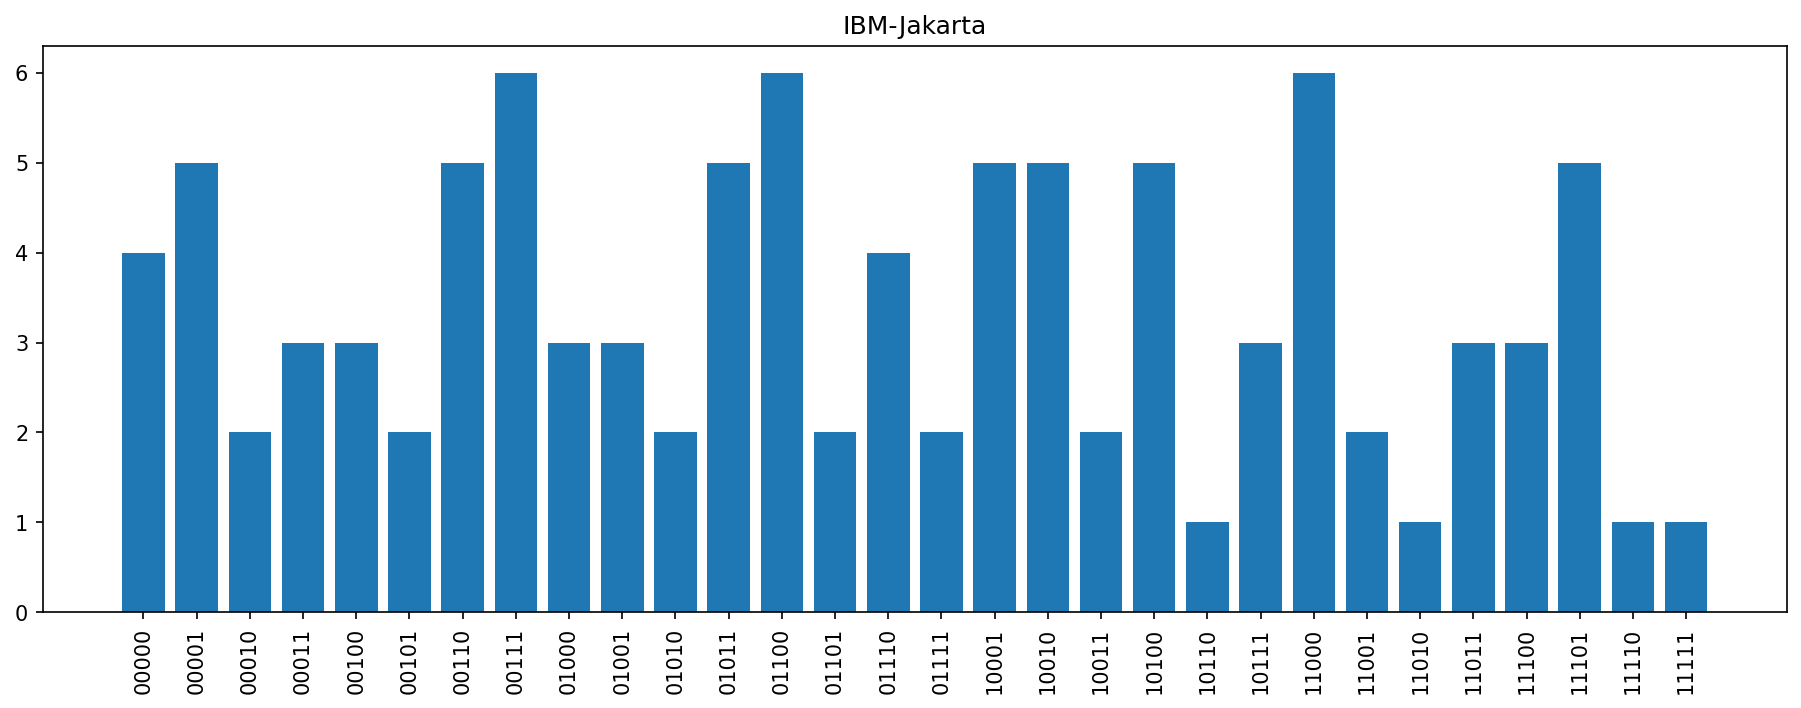


 IonQ : Done
{'00000': 4, '00001': 2, '00010': 6, '00011': 5, '00100': 2, '00101': 3, '00110': 3, '00111': 1, '01000': 5, '01001': 1, '01010': 2, '01011': 4, '01100': 6, '01101': 8, '01110': 2, '01111': 7, '10000': 4, '10001': 4, '10010': 4, '10011': 3, '10100': 1, '10101': 2, '10110': 3, '10111': 1, '11000': 5, '11010': 4, '11011': 3, '11100': 1, '11101': 2, '11110': 2}


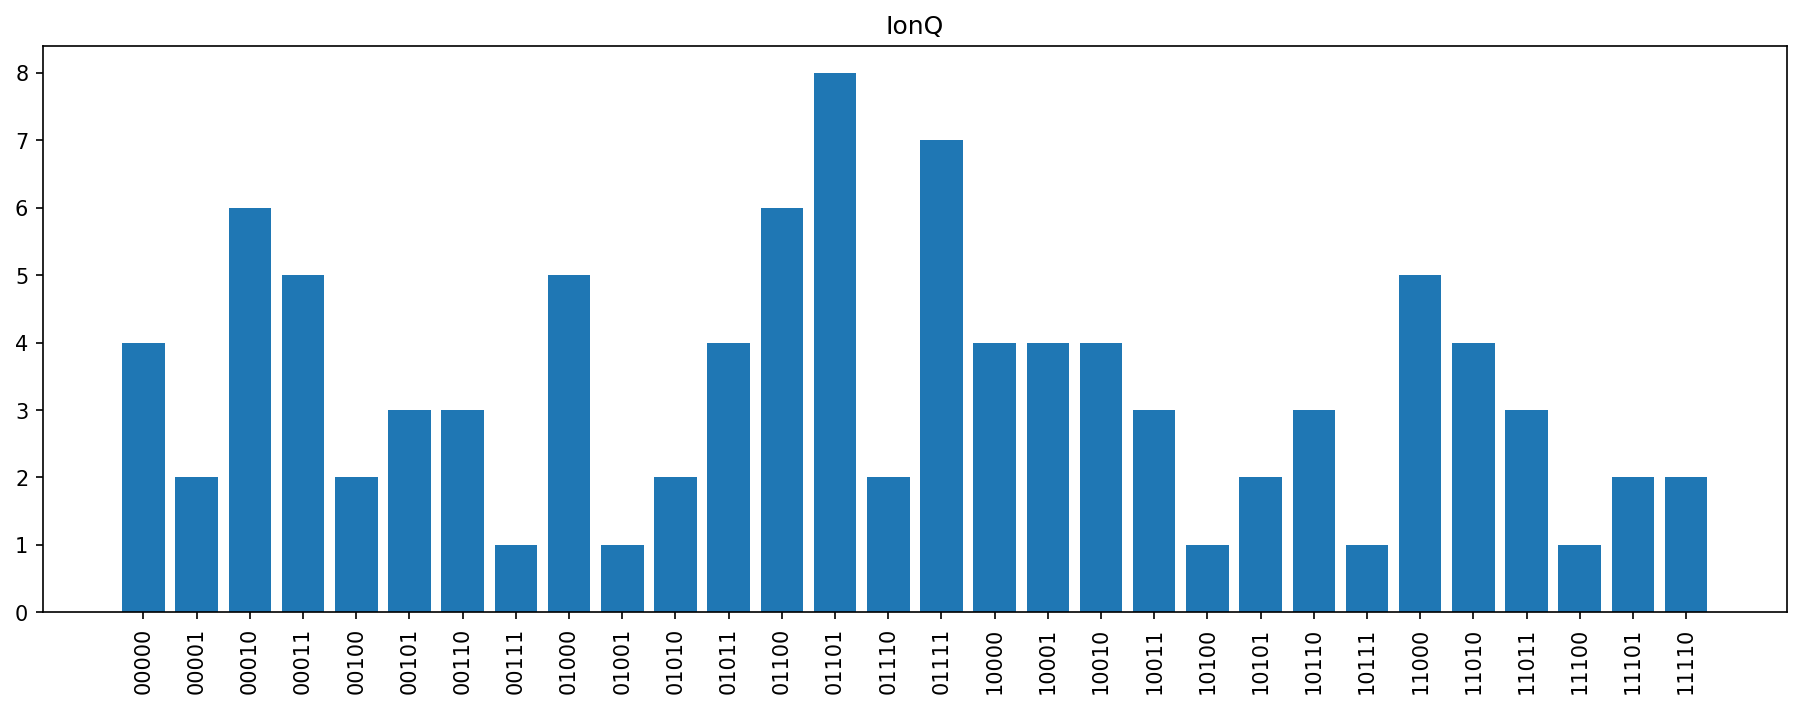


 IBM-Sim : Done
{'00000': 3, '00001': 6, '00010': 3, '00011': 4, '00100': 1, '00101': 8, '00110': 1, '00111': 3, '01000': 1, '01001': 2, '01011': 3, '01100': 4, '01101': 3, '01110': 7, '01111': 3, '10000': 3, '10001': 2, '10010': 2, '10011': 1, '10100': 4, '10101': 2, '10110': 1, '10111': 4, '11000': 2, '11001': 3, '11010': 6, '11011': 6, '11100': 2, '11101': 2, '11110': 4, '11111': 4}


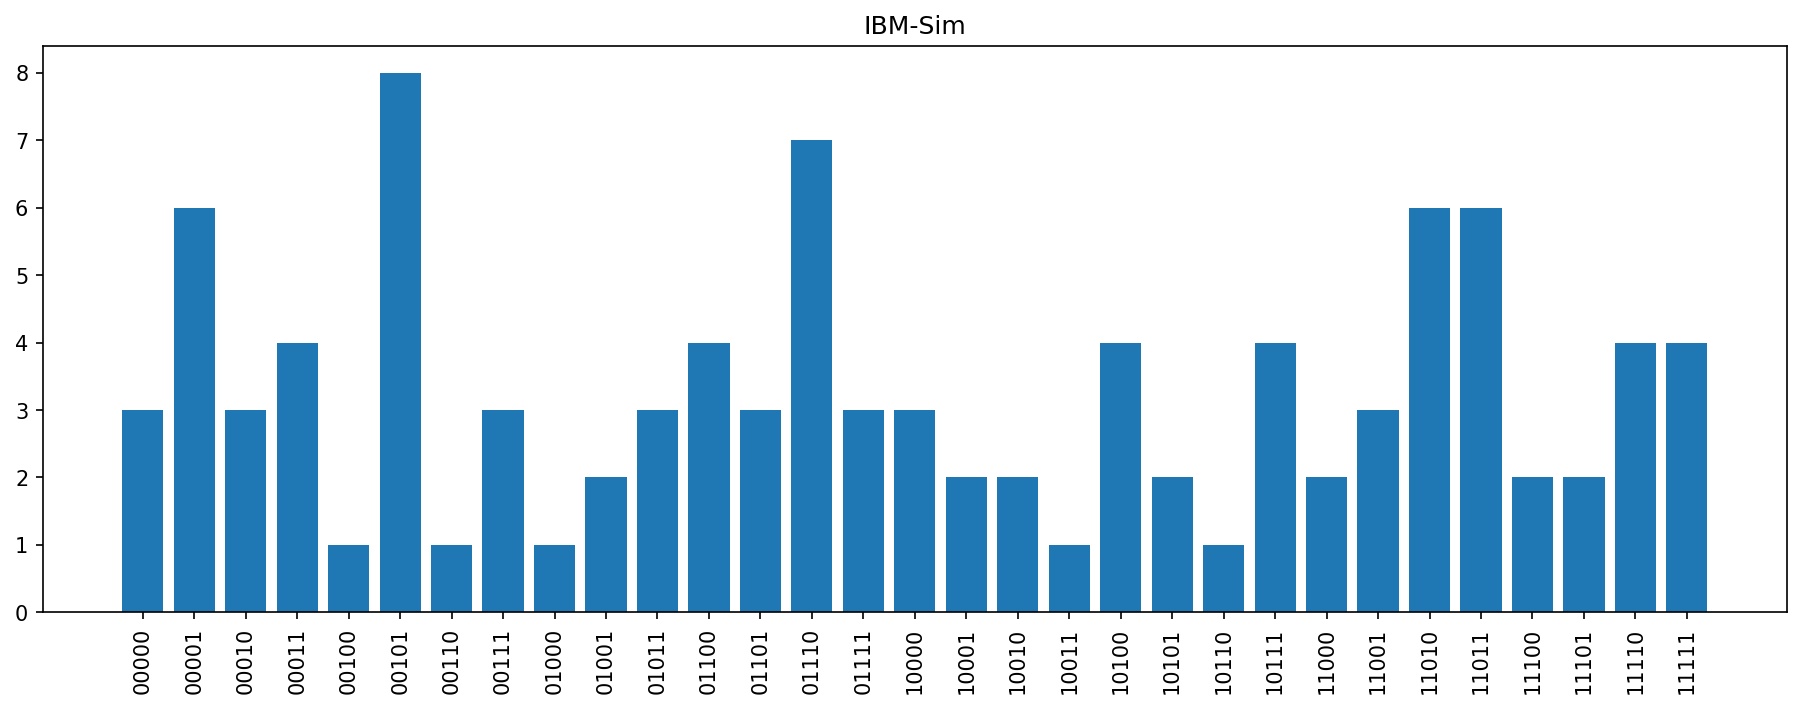


 AWS-Sim : Done
{'00000': 1, '00001': 4, '00010': 3, '00011': 1, '00100': 4, '00101': 5, '00110': 2, '00111': 4, '01000': 2, '01001': 1, '01010': 2, '01011': 4, '01100': 6, '01101': 2, '01110': 2, '01111': 3, '10000': 2, '10001': 4, '10010': 4, '10011': 5, '10100': 2, '10101': 3, '10110': 4, '10111': 1, '11000': 2, '11001': 6, '11010': 6, '11011': 1, '11100': 7, '11101': 1, '11110': 6}


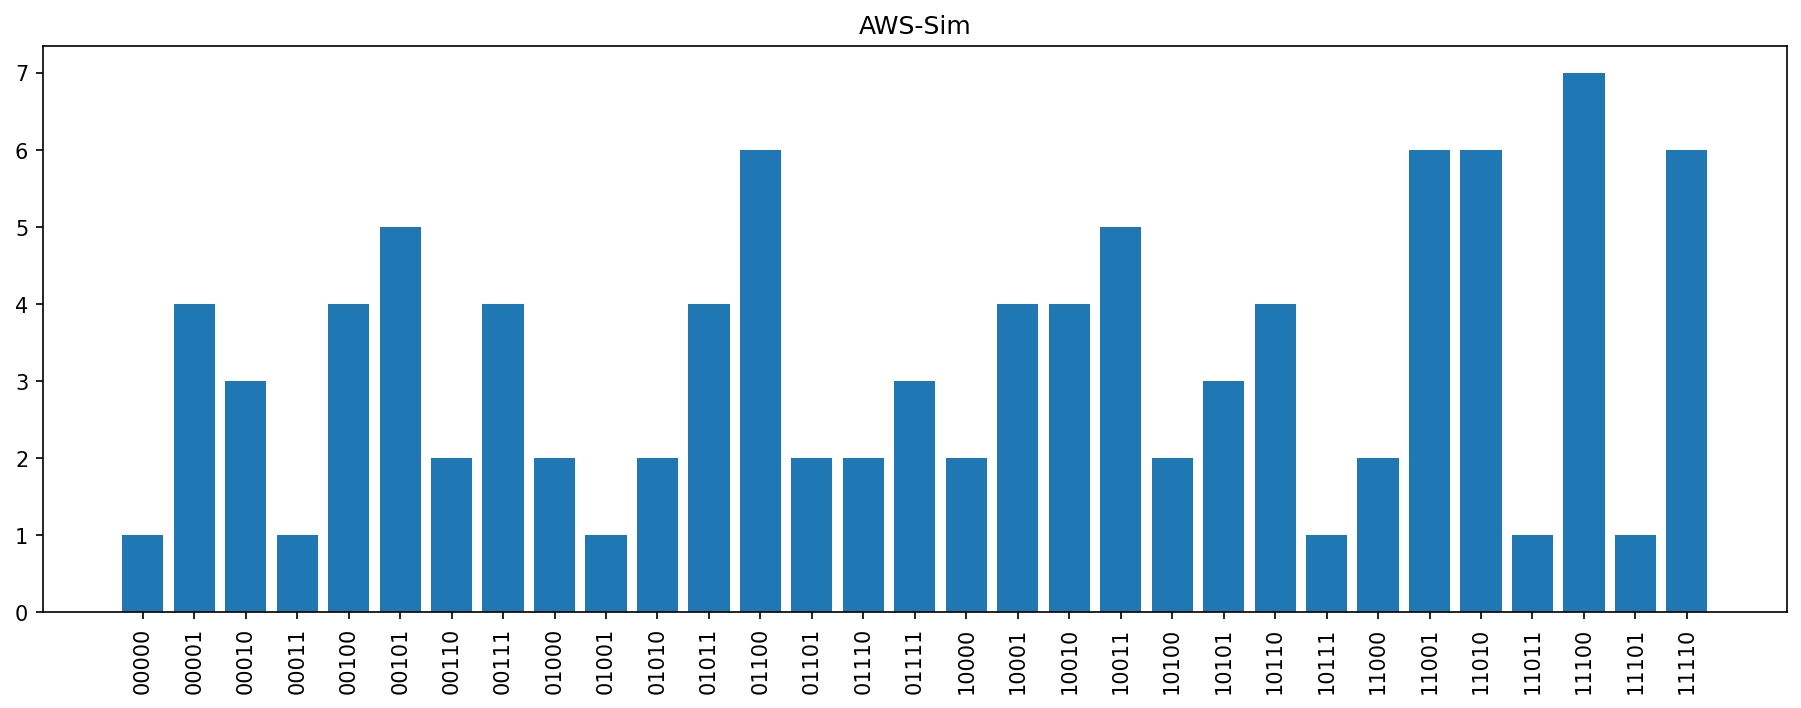

In [7]:
jobs = [jakarta_job, ionq_job, ibmq_qasm_job, aws_sv1_job]
names = "IBM-Jakarta", "IonQ", "IBM-Sim", "AWS-Sim"
for job, name in zip(jobs, names):
    print("\n", name, ":", job.status())
    if job.status() == "Done":
        print(job.counts())
        plot_counts(job.counts(), name)

## Travelling Salesman Problem (TSP)

In [8]:
out = service.tsp(["Chicago", "New York City", "Los Angeles"])
out

TSPOutput(route=['Chicago', 'Los Angeles', 'New York City', 'Chicago'], route_list_numbers=[0, 2, 1, 0], total_distance=[5594.18], map_link=['https://www.google.com/maps/dir/?api=1&origin=Chicago&destination=Chicago&waypoints=Los+Angeles%7CNew+York+City%7C'], qubo={('0',): -52856232.0, ('1',): -58617819.0, ('2',): -52856418.0, ('3',): -57371594.0, ('4',): -58616854.0, ('5',): -57371306.0, ('0', '1'): 30930176.0, ('0', '2'): 15465088.0, ('0', '3'): 15465088.0, ('0', '4'): 15465088.0, ('0', '5'): 30930176.0, ('1', '2'): 15465088.0, ('1', '3'): 30930176.0, ('1', '4'): 30930176.0, ('1', '5'): 15465088.0, ('2', '3'): 30930176.0, ('2', '4'): 30930176.0, ('2', '5'): 15465088.0, ('3', '4'): 15465088.0, ('3', '5'): 30930176.0, ('4', '5'): 30930176.0, (): 131453248.0})